In [59]:
import numpy as np
from scipy.optimize import minimize, fmin_cg, fmin_ncg
import matplotlib.pyplot as plt

In [3]:
'''
method : Type of solver

simplex(no derivative):
    Nelder-Mead
    
Newton(derivative)
    Newton-CG
    CG
    
quasi-Newton (no derivative, finite difference)
    BFGS
    
etc
    Powell 
    L-BFGS-B
    TNC
    COBYLA
    SLSQP
    dogleg
    trust-ncg
'''

'\nmethod : Type of solver\n\nsimplex(no derivative):\n    Nelder-Mead\n    \nNewton(derivative)\n    Newton-CG\n    CG\n    \nquisi-Newton (no derivative, finite difference)\n    BFGS\n    \netc\n    Powell \n    L-BFGS-B\n    TNC\n    COBYLA\n    SLSQP\n    dogleg\n    trust-ncg\n'

In [64]:
def my_f1(x):
    return x[0]**2

x0 = np.array([1.0])
res = minimize(my_f1, x0, method='nelder-mead',
        options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 62


In [66]:
x0 = np.array([-10, 1.0, 2.0, 3.0])
res = minimize(my_f1, x0, method='nelder-mead',
        options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 148
         Function evaluations: 270


In [5]:
def my_f2(x):
    x0 = x[0]
    return x0*(x0-1)*(x0-2)*(x0-10)

x0 = np.array([1.0])
res = minimize(my_f2, x0, method='nelder-mead',
        options={'xtol': 1e-8, 'disp': True})

x0 = np.array([3.0])
res = minimize(my_f2, x0, method='nelder-mead',
        options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: -3.688539
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -676.848863
         Iterations: 33
         Function evaluations: 67


In [6]:
def my_f3(x):
    x0 = x[0]
    return x0**4 + 2*x0

def my_df3(x):
    x0 = x[0]
    return 4*x0**3 + 2

x0 = np.array([1.0])
res = fmin_ncg(my_f3, x0, my_df3)

x0 = np.array([100.0])
res = fmin_ncg(my_f3, x0, my_df3)

x0 = np.array([-100.0])
res = fmin_ncg(my_f3, x0, my_df3)

Optimization terminated successfully.
         Current function value: -1.190551
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 29
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: -1.190551
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 73
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: -1.190551
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 64
         Hessian evaluations: 0


In [7]:
res = minimize(my_f3, [1], method='nelder-mead',
        options={'xtol': 1e-8, 'disp': True})

res = minimize(my_f3, [1], method='CG',
        options={'xtol': 1e-8, 'disp': True})

res = minimize(my_f3, [1], method='BFGS',
        options={'xtol': 1e-8, 'disp': True})


Optimization terminated successfully.
         Current function value: -1.190551
         Iterations: 32
         Function evaluations: 64
         Current function value: -1.168071
         Iterations: 2
         Function evaluations: 27
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: -1.190551
         Iterations: 7
         Function evaluations: 27
         Gradient evaluations: 9


C:\Users\Semin Kim\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: OptimizeWarning: Unknown solver options: xtol
C:\Users\Semin Kim\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: OptimizeWarning: Unknown solver options: xtol


In [8]:
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
        options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [9]:
# What is the minimum of a function (x-x**2-x**3+5*x**4-20*x**6+x**8) and where is it achieved?  
# Obtain precision of 4 digits using at least 3 different algorithms. Briefly compare their performance

In [34]:
# note that by looking at the highest order term x^6(x^2-20), we can see that if x^2 > 20, then it domininates and positive. 
# we check it using graph

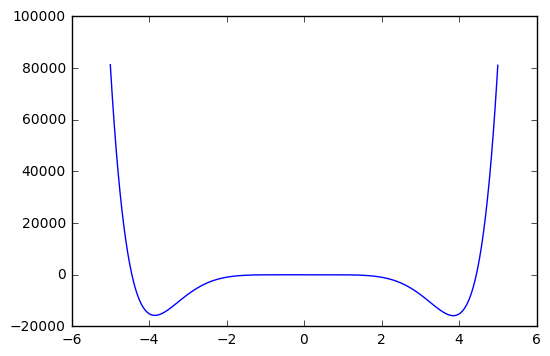

In [101]:
def f(x):
    return x-x**2-x**3+5*x**4-20*x**6+x**8

def df(x):
    return 1-2*x-3*x**2+20*x**3-120*x**5+8*x**7

x = np.linspace(-5,5,1000)

plt.plot(x,f(x), 'b-')
#plt.plot(x,df(x), 'rx')
plt.show()

In [102]:
# so we expect all critical points are in (-5, 5)
# apply optimization method with random initial points

In [107]:
N = 20
init_points = 10*(np.random.random(N)-0.5)

x_min = None
f_min = 100
for x0 in init_points:
    res = minimize(f, x0, method='nelder-mead',
            options={'xtol': 1e-8, 'disp': False})
    if res.fun < f_min:
        f_min = res.fun
        x_min = res.x

print(x_min)
print(f_min)

[ 3.85215188]
-15830.6710035


In [118]:
res = minimize(f, [1], method='nelder-mead')
res

 final_simplex: (array([[ 3.85214844],
       [ 3.85219727]]), array([-15830.67100318, -15830.67095021]))
           fun: -15830.671003180352
       message: 'Optimization terminated successfully.'
          nfev: 42
           nit: 21
        status: 0
       success: True
             x: array([ 3.85214844])

In [116]:
res = minimize(f, [1], method='BFGS')
res

      fun: -15830.67100348702
 hess_inv: array([[ 0.02963355]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 2
     njev: 11
   status: 0
  success: True
        x: array([ 3.85215187])

In [119]:
fmin_ncg(f, [1], df)

Optimization terminated successfully.
         Current function value: -15830.671003
         Iterations: 3
         Function evaluations: 11
         Gradient evaluations: 19
         Hessian evaluations: 0


array([ 3.85215188])

In [120]:
fmin_cg(f, [1], df)

         Current function value: -15830.671003
         Iterations: 1
         Function evaluations: 21
         Gradient evaluations: 9


array([ 3.85215666])